In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
np.random.seed(0)
sns.set(style='darkgrid',color_codes=True )
tips = sns.load_dataset('tips')


In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


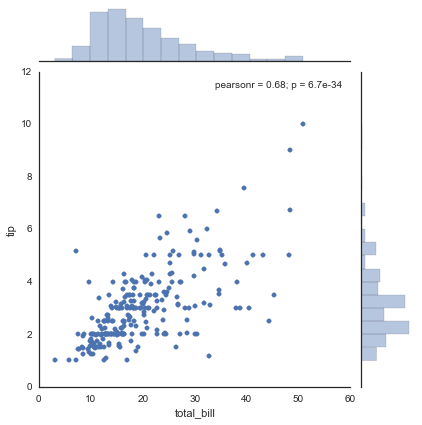

In [16]:
g = sns.jointplot(x='total_bill',y='tip',data=tips)

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

Add regression and kernel density fits:

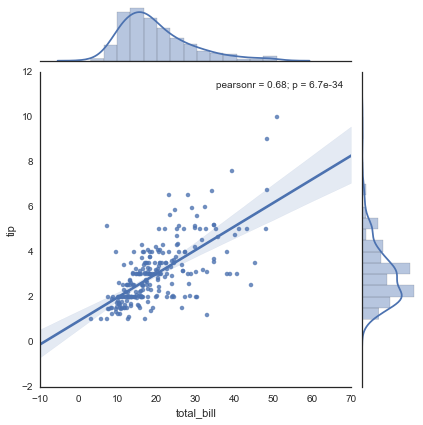

In [18]:
g = sns.jointplot('total_bill','tip', data=tips, kind='reg')

Replace the scatterplots and histograms with density estimates and align the marginal Axes tightly with the joint Axes:

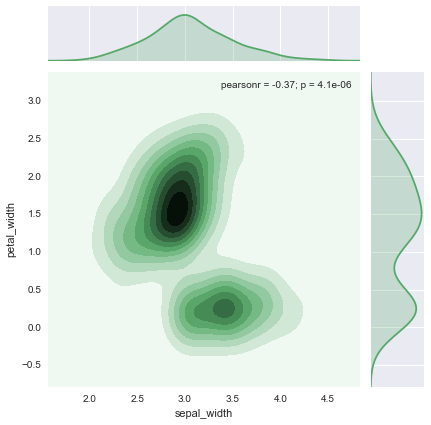

In [27]:
iris = sns.load_dataset('iris')
g = sns.jointplot('sepal_width','petal_width', data=iris, kind='kde', color='g')

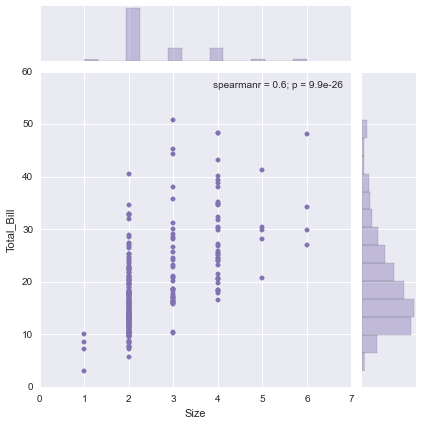

In [38]:
from scipy.stats import spearmanr
g = sns.jointplot('size','total_bill',stat_func =spearmanr,data=tips,color='m')
g.set_axis_labels('Size','Total_Bill')

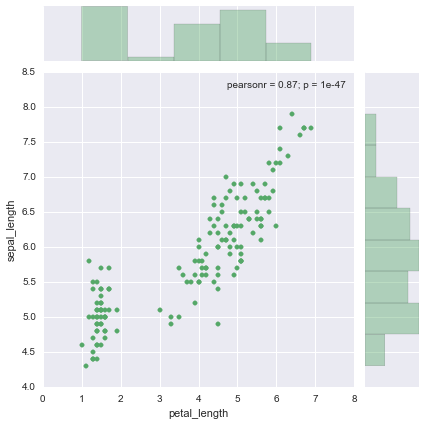

In [43]:
g = sns.jointplot('petal_length','sepal_length',data=iris, color='g')

pairplot

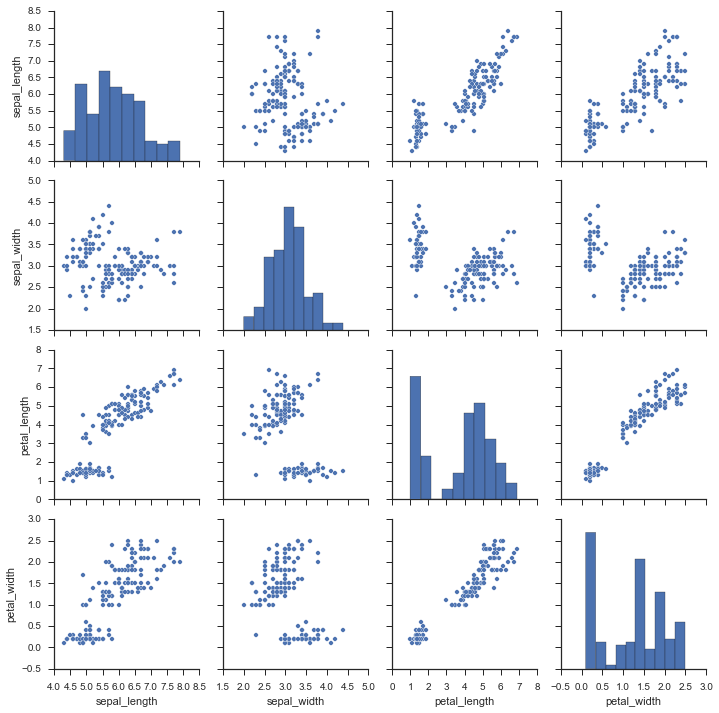

In [50]:
sns.set(style='ticks')
g = sns.pairplot(iris)

Show different levels of a categorical variable by the color of plot elements:



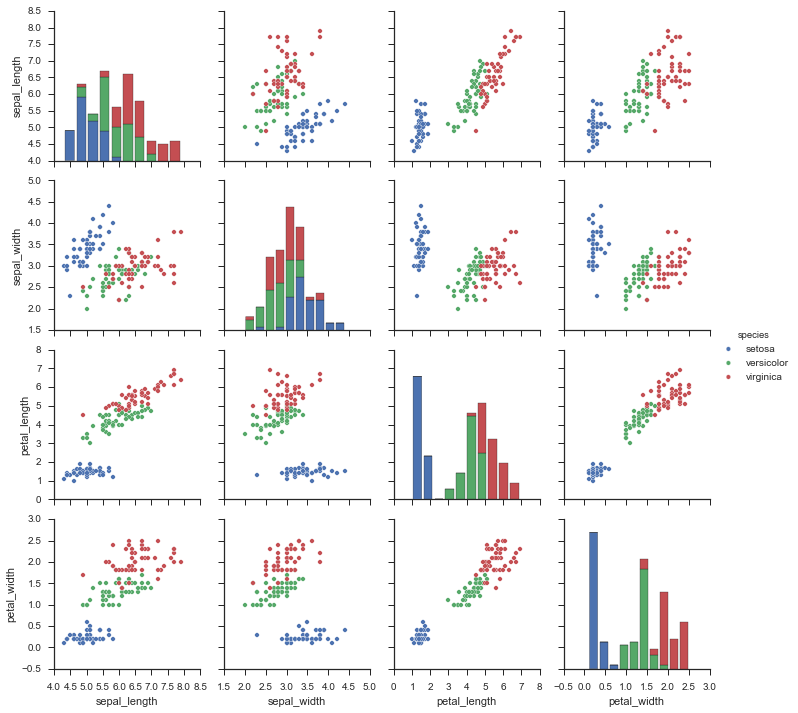

In [51]:
g = sns.pairplot(iris, hue='species')

Use different markers for each level of the hue variable:



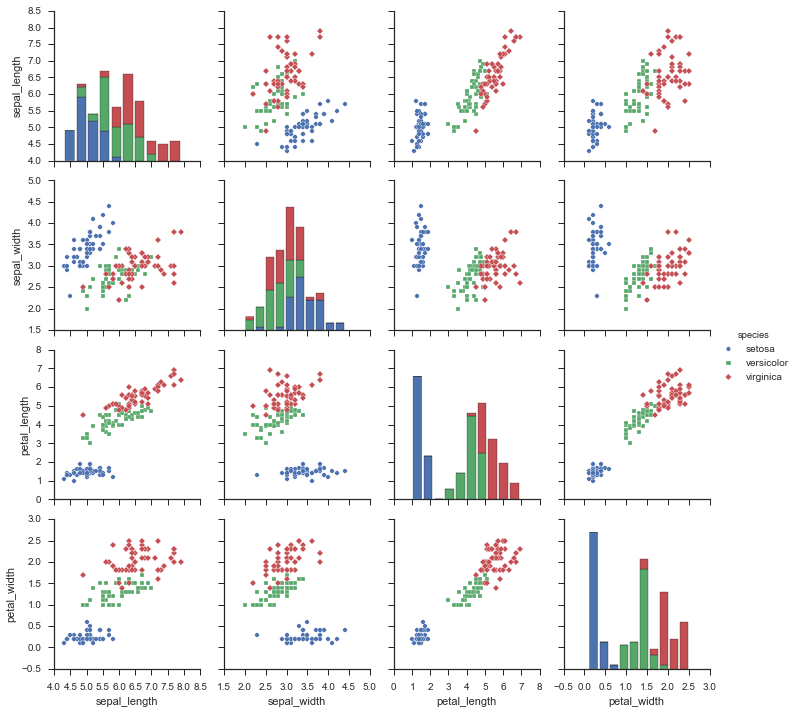

In [56]:
g = sns.pairplot(iris, hue='species', markers=['o','s','D'])

Plot a subset of variables:

Draw larger plot with size=?

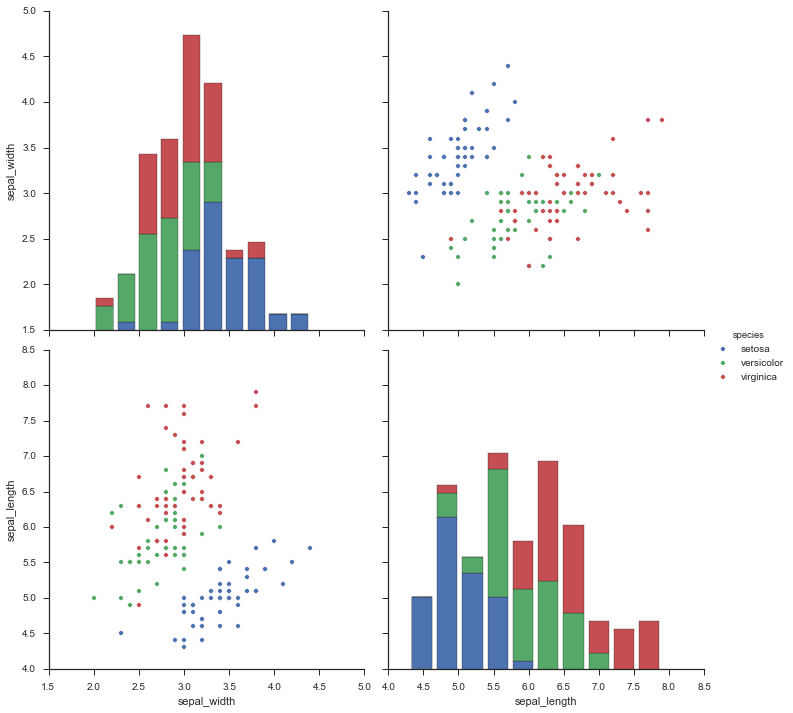

In [59]:
g = sns.pairplot(iris, vars=['sepal_width','sepal_length'], hue='species',size=5)

Plot different variables in the rows and columns:



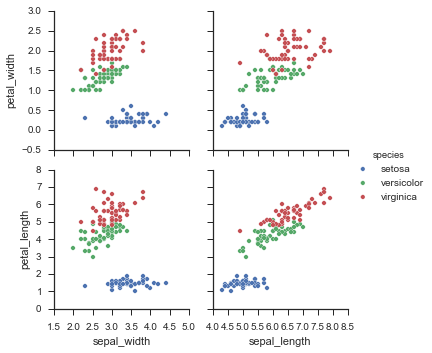

In [61]:
g = sns.pairplot(iris, x_vars=['sepal_width','sepal_length'], y_vars=['petal_width','petal_length'], hue='species')

distplot

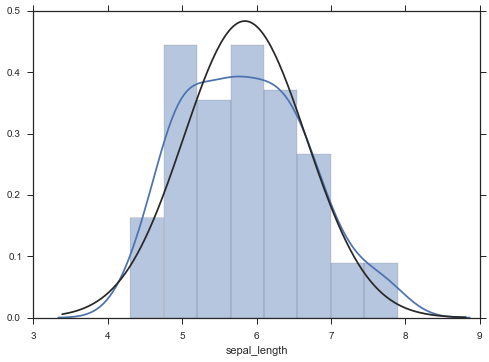

In [88]:
from scipy.stats import norm
g = sns.distplot(iris['sepal_length'],fit=norm)

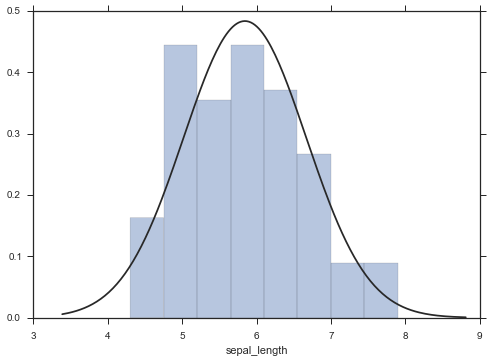

In [89]:
from scipy.stats import norm
g = sns.distplot(iris['sepal_length'],fit=norm, kde=False)

rug= true will show the exact values of points

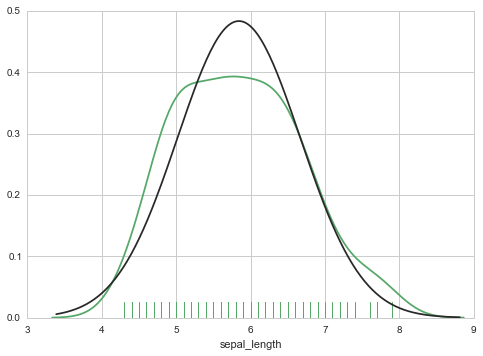

In [237]:
from scipy.stats import norm
sns.distplot(iris['sepal_length'],rug=True,hist=False,fit=norm, color='g')

 #### Regression plots
 lmplot

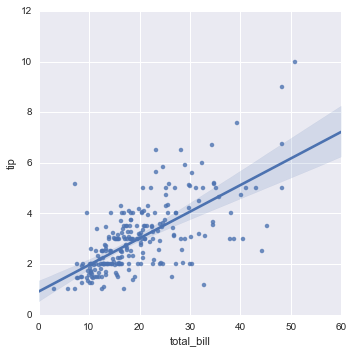

In [101]:
g = sns.lmplot(x='total_bill',y='tip', data=tips)

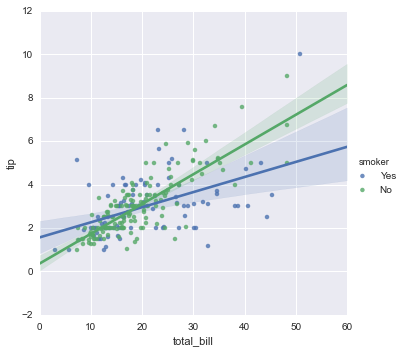

In [103]:
#Condition on a third variable and plot the levels in different colors:
g = sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker')

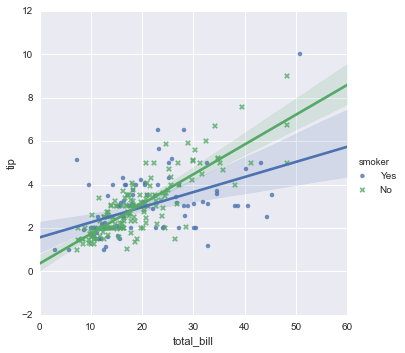

In [109]:
# Use different markers as well as colors so the plot will reproduce to black-and-white more easily:
g = sns.lmplot('total_bill','tip',data=tips, hue='smoker',markers=['o','x'])

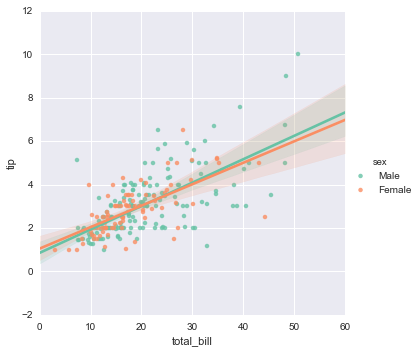

In [114]:
# Use a different color palette:
g = sns.lmplot('total_bill','tip',data=tips, hue='sex',palette='Set2')

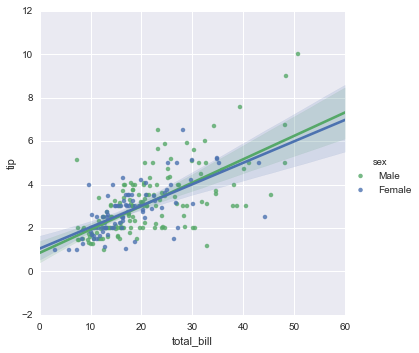

In [121]:
#Map hue levels to colors with a dictionary:
g = sns.lmplot('total_bill','tip',data=tips, hue='sex', palette=dict(Male='g',Female='b'))

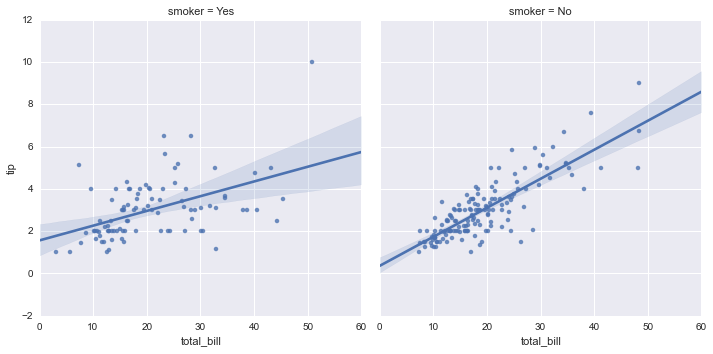

In [124]:
#Plot the levels of the third variable across different columns:
g = sns.lmplot('total_bill','tip',data=tips, col='smoker')

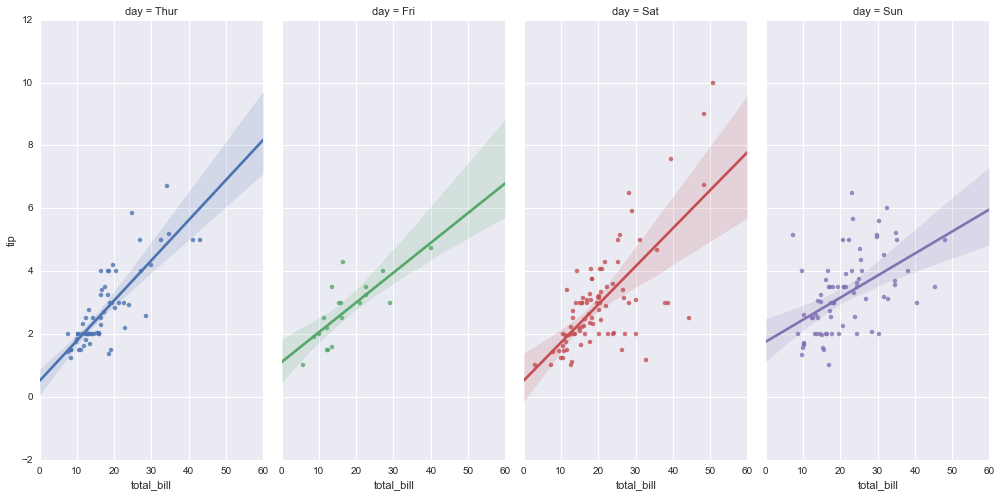

In [132]:
#Change the size and aspect ratio of the facets:
g = sns.lmplot('total_bill','tip',data=tips,size=7, hue='day',col='day',aspect=0.5)

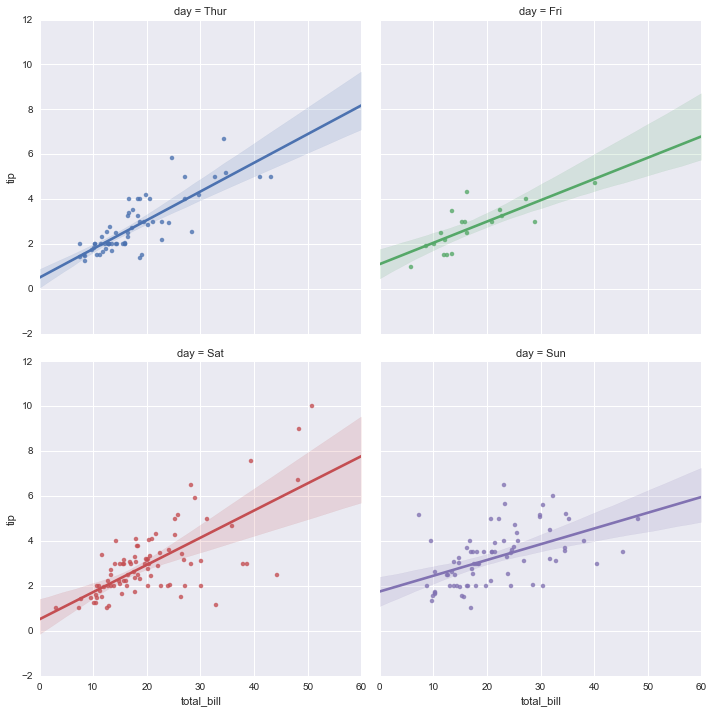

In [140]:
#Wrap the levels of the column variable into multiple rows:
g = sns.lmplot('total_bill','tip',data=tips,hue='day', col='day',col_wrap=2)

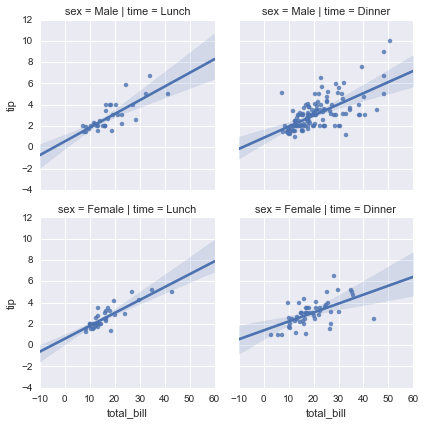

In [145]:
#Condition on two variables to make a full grid:
g = sns.lmplot('total_bill','tip',data=tips,row='sex',size=3, col='time')

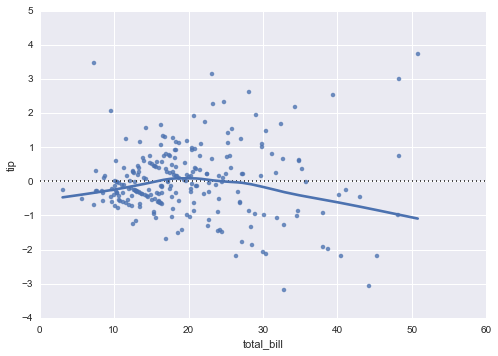

In [150]:
# resid plot
#draw a scatterplot of the residuals. a lowess smoother to the residual plot can help in determining if there is structure to the residuals.
g = sns.residplot('total_bill','tip',data=tips,lowess=True)

### Categorical plots¶


In [165]:
# factor plot
df = sns.load_dataset('exercise')

In [166]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


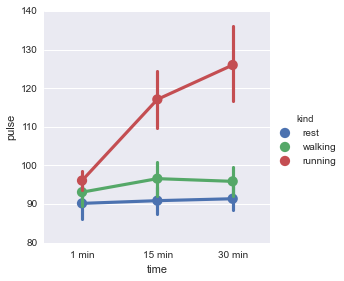

In [168]:
g =sns.factorplot('time', 'pulse',data=df, hue='kind')

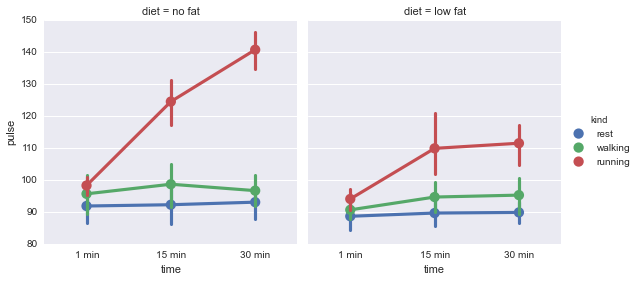

In [171]:
# facet along the columns to show third categorical variable
g =sns.factorplot('time', 'pulse',data=df,hue='kind', col='diet')

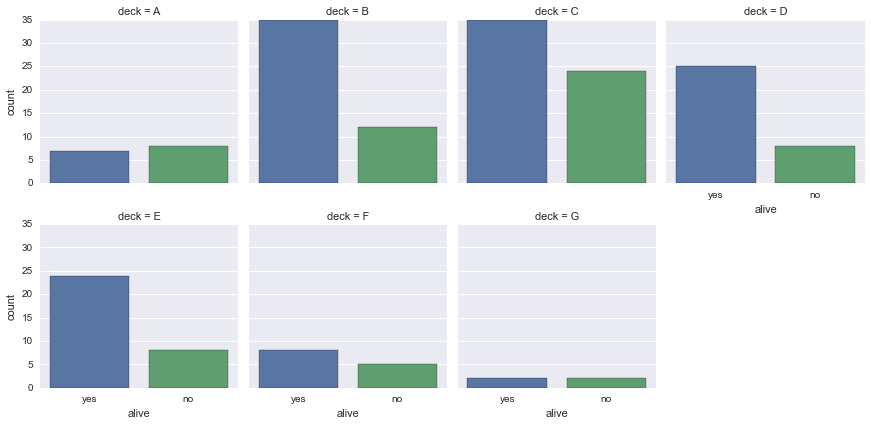

In [181]:
#Make many column facets and wrap them into the rows of the grid:
titanic = sns.load_dataset('titanic')
g = sns.factorplot('alive',col='deck', data=titanic[titanic.deck.notnull()],kind='count',col_wrap=4,size=3)

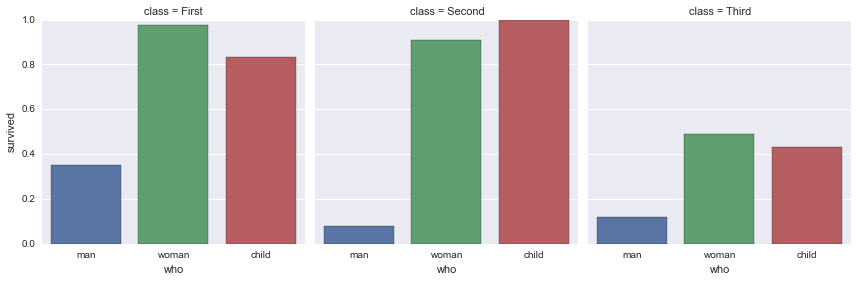

In [188]:
g = sns.factorplot('who','survived',data=titanic,kind='bar', col='class', ci=None)

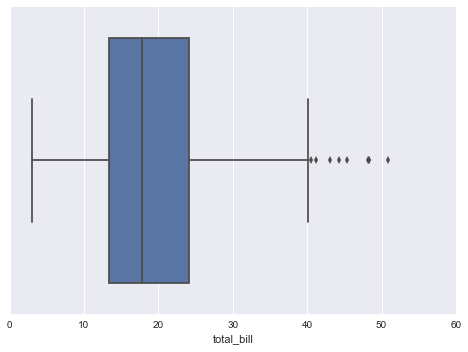

In [191]:
# box plot
g = sns.boxplot(x='total_bill', data=tips)

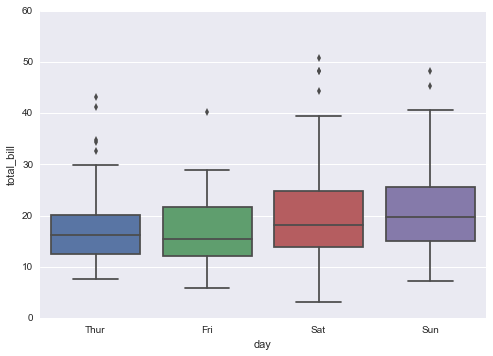

In [190]:
# a vertical boxplot grouped by a categorical variable:
g = sns.boxplot(x='day',y='total_bill', data=tips)

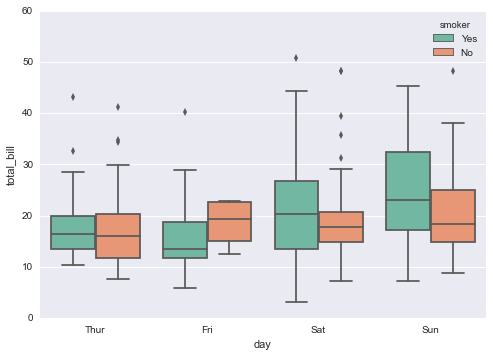

In [192]:
# Draw a boxplot with nested grouping by two categorical variables:
g = sns.boxplot(x='day',y='total_bill', hue='smoker', data=tips, palette='Set2')

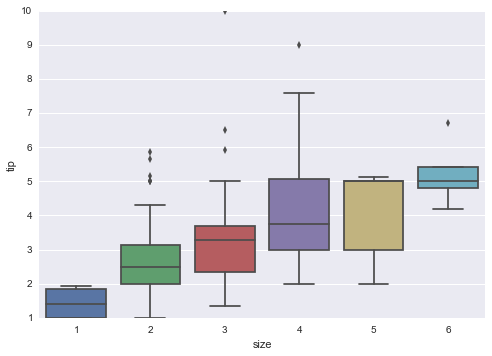

In [193]:
#Control box order by sorting the input data:
# to control order use order=(1,2,3,4,5,6)
g = sns.boxplot('size','tip', data= tips.sort('size'))

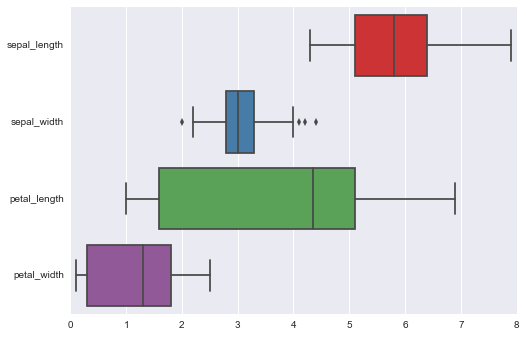

In [196]:
# Draw a boxplot for each numeric variable in a DataFrame:

g = sns.boxplot(data=iris, orient='h', palette='Set1')

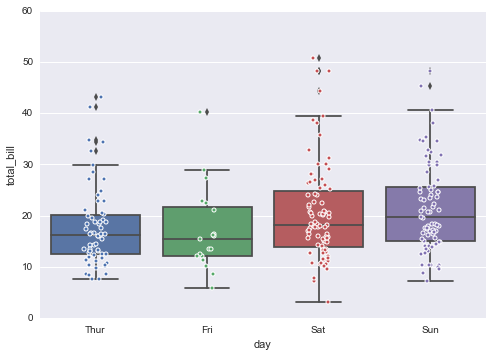

In [199]:
# Use stripplot() to show the datapoints on top of the boxes:
g = sns.boxplot('day','total_bill',data=tips)
g = sns.stripplot('day','total_bill', data=tips, jitter=True,size=4)

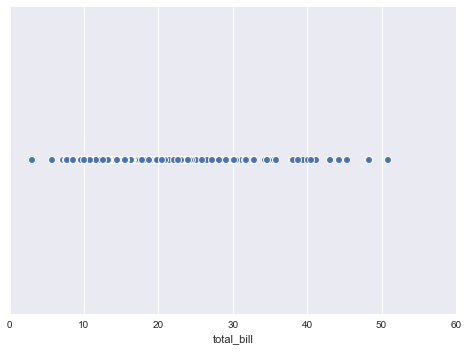

In [200]:
# stripplot
g =sns.stripplot('total_bill', data=tips)

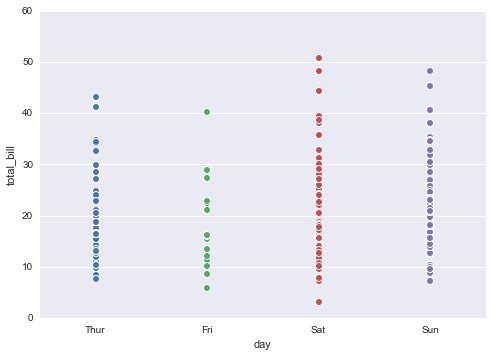

In [202]:
#Group the strips by a categorical variable:
g = sns.stripplot('day','total_bill', data=tips)

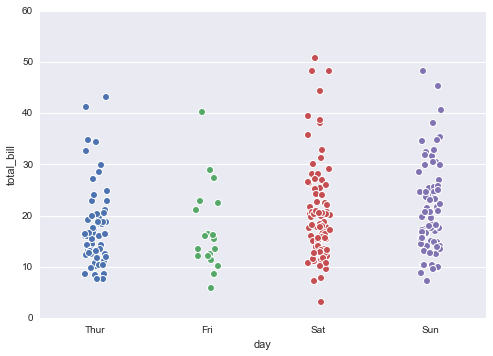

In [203]:
#Add jitter to bring out the distribution of values:
g = sns.stripplot('day','total_bill', data=tips, jitter=True)

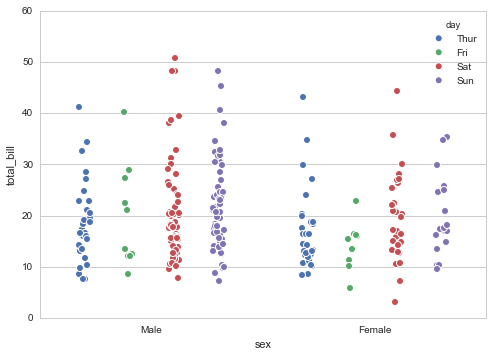

In [206]:
#Nest the strips within a second categorical variable:
sns.set_style("whitegrid")
g = sns.stripplot('sex','total_bill', data=tips, hue='day',jitter=True)

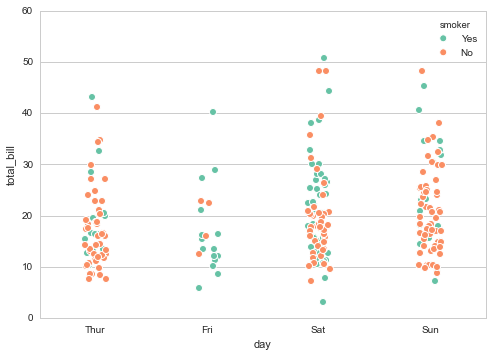

In [207]:
#Draw each level of the hue variable at the same location on the major categorical axis:
g = sns.stripplot('day','total_bill', data=tips, hue='smoker',jitter=True, split=False, palette='Set2')

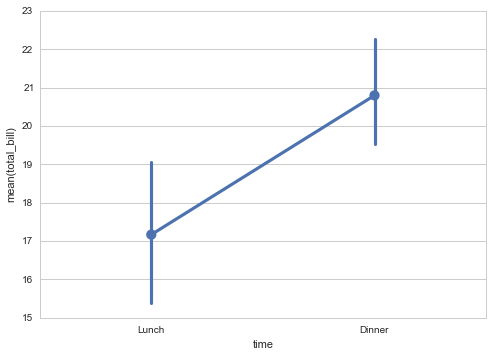

In [212]:
# point plot.. it is very useful when comparing different categories
g = sns.pointplot('time','total_bill', data=tips)

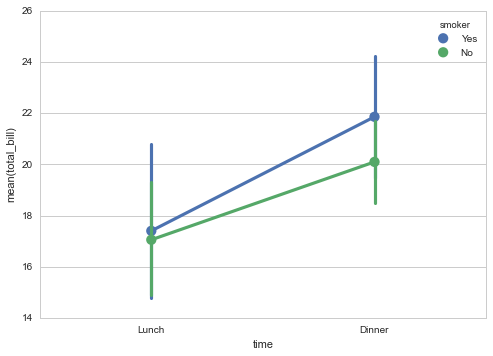

In [213]:
# Draw a set of vertical points with nested grouping by a two variables:
g = sns.pointplot('time','total_bill', data=tips, hue='smoker')

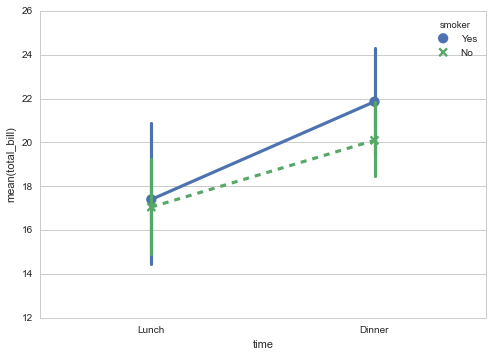

In [215]:
# Use a different marker and line style for the hue levels:
g = sns.pointplot('time','total_bill', data=tips, hue='smoker', markers=['o','x'], linestyles=['-','--'])

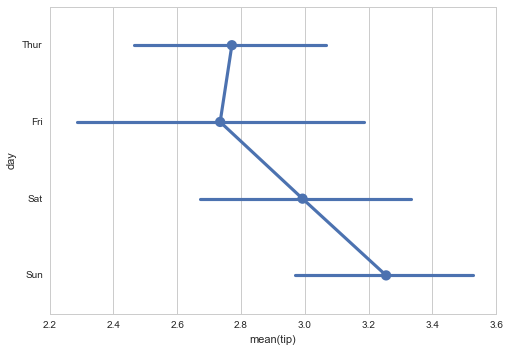

In [217]:
#Draw a set of horizontal points:
g = sns.pointplot('tip','day', data=tips)

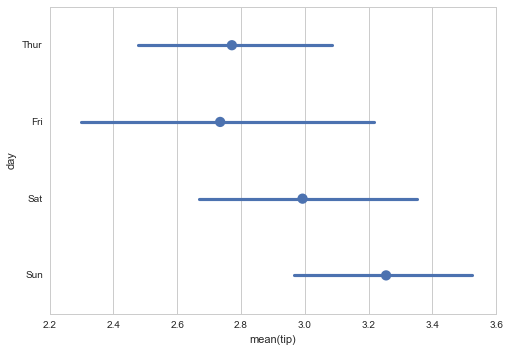

In [218]:
#Don’t draw a line connecting each point:
g = sns.pointplot('tip','day', data=tips, join=False)

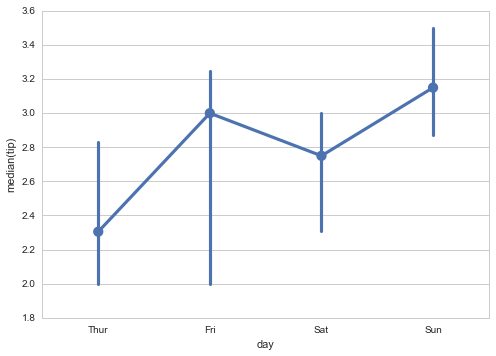

In [219]:
# Use median as the estimate of central tendency:
from numpy import median
g = sns.pointplot('day','tip', data=tips, estimator=median)

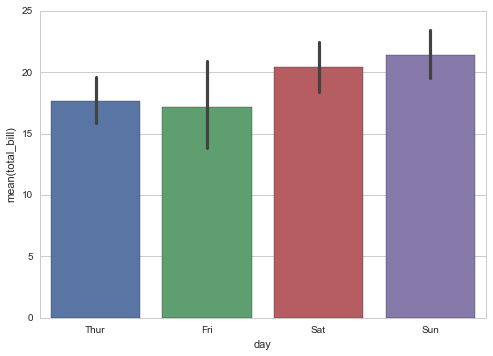

In [220]:
# bar plot
ax = sns.barplot('day','total_bill', data=tips)

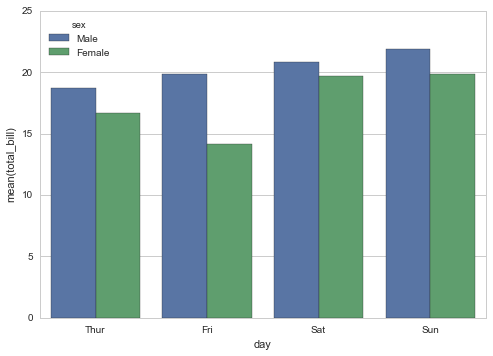

In [227]:
ax = sns.barplot('day','total_bill', data=tips, hue='sex',ci=None)

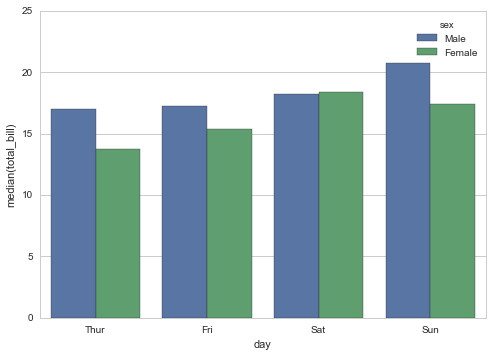

In [232]:
# Use median as the estimate of central tendency:
ax = sns.barplot('day','total_bill', data=tips,ci=None,  hue='sex',estimator=median)

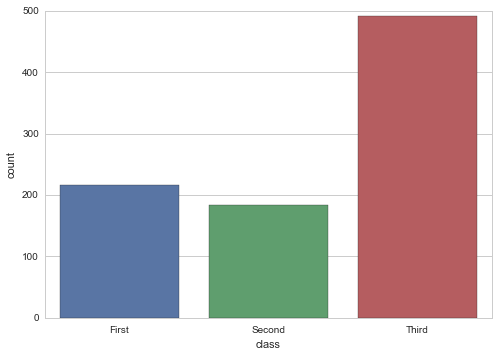

In [233]:
# count plot
ax = sns.countplot(x='class', data=titanic)

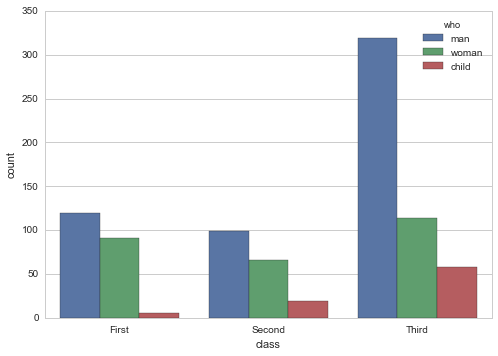

In [234]:
# Show value counts for two categorical variables:
ax = sns.countplot(x='class', hue='who', data=titanic)

In [3]:
import numpy as np
features = np.random.randint(0,10,size=[100,10000])

In [8]:
len(features[0])

10000

In [9]:
features

array([[2, 9, 2, ..., 7, 3, 0],
       [6, 4, 9, ..., 7, 9, 8],
       [7, 2, 3, ..., 5, 2, 2],
       ..., 
       [5, 7, 8, ..., 1, 9, 7],
       [0, 2, 0, ..., 1, 3, 7],
       [3, 2, 6, ..., 7, 0, 2]])